In [22]:
import numpy as np
def W(t, n):
    t = np.atleast_2d(t).T
    n = np.atleast_2d(n).T
    w  = np.block([t,n])
    return w

def rotation_matrix_2d(theta):
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return R

def jacobian(l1,l2,theta1,theta2):
    J = np.array([[-l1*np.sin(theta1), -l2*np.sin(theta2)],
                  [l1*np.cos(theta1), l2*np.cos(theta2)]])
    return J



# test
t = np.array([0, -1])
n = np.array([1, 0])
theta = 0
theta1 = 120*(np.pi/180)
theta2 = np.pi/6
l1 = 0.866
l2 = 0.5
w= W(t, n)
R= rotation_matrix_2d(theta)
J = jacobian(l1,l2,theta1,theta2)
print(w)

print(R)

print(J)

[[ 0  1]
 [-1  0]]
[[ 1. -0.]
 [ 0.  1.]]
[[-0.749978  -0.25     ]
 [-0.433      0.4330127]]


In [23]:
def hand_jacobian(t,n,w,R,J):

    WRJ = np.dot(np.dot(w,R), J)
    O  = np.zeros((2,2))
    HJR1 = np.concatenate([WRJ,O],axis=1)
    return HJR1

HJR1 = hand_jacobian(t,n,w,R,J)
print(HJR1)


[[-0.433      0.4330127  0.         0.       ]
 [ 0.749978   0.25       0.         0.       ]]


In [24]:
t = np.array([0, 1])
n = np.array([-1, 0])
theta = 0
theta1 = 120*(np.pi/180)
theta2 = np.pi/6
l1 = 0.866
l2 = 0.5
w= W(t, n)
R= rotation_matrix_2d(theta)
J = jacobian(l1,l2,theta1,theta2)
print(w)

print(R)

print(J)

[[ 0 -1]
 [ 1  0]]
[[ 1. -0.]
 [ 0.  1.]]
[[-0.749978  -0.25     ]
 [-0.433      0.4330127]]


In [25]:
def hand_jacobian(t1,n1,w,R,J):

    WRJ = np.dot(np.dot(w,R), J)
    O  = np.zeros((2,2))
    HJR2 = np.concatenate([O,WRJ], axis = 1)
    return HJR2

HJR2 = hand_jacobian(t,n,w,R,J)
print(HJR2)

[[ 0.         0.         0.433     -0.4330127]
 [ 0.         0.        -0.749978  -0.25     ]]


In [26]:
Hand_jacobian = np.concatenate([HJR1,HJR2])
print(Hand_jacobian)

[[-0.433      0.4330127  0.         0.       ]
 [ 0.749978   0.25       0.         0.       ]
 [ 0.         0.         0.433     -0.4330127]
 [ 0.         0.        -0.749978  -0.25     ]]


In [27]:
# Define ellipse
h, k = 0, 0  # Center of the ellipse
a, b = 2, 1  # Semi-major and semi-minor axis lengths


In [28]:
def New_Hand_jacobian(Hand_jacobian,dx,dy):
  translation_matrix = np.array([[1,0,0,dx],
                                 [0,1,0,dy],
                                 [0,0,1,0],
                                 [0,0,0,1]])
  New_Hand_jacobian_matrix = np.dot(translation_matrix,Hand_jacobian)
  return  New_Hand_jacobian_matrix

In [29]:
# calculate value of theta for 20 points
corner_points = 20

# Calculate theta values
theta_values = np.linspace(0, 2*np.pi, corner_points, endpoint=False)  #syntax of this code {np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)}

# Print the theta values
points = []
for theta in theta_values:
    x = h + a * np.cos(theta)
    y = k + b * np.sin(theta)
    points.append((x, y))
for point in points:
  print(point)

(2.0, 0.0)
(1.902113032590307, 0.3090169943749474)
(1.618033988749895, 0.5877852522924731)
(1.1755705045849463, 0.8090169943749475)
(0.6180339887498949, 0.9510565162951535)
(1.2246467991473532e-16, 1.0)
(-0.6180339887498947, 0.9510565162951536)
(-1.175570504584946, 0.8090169943749475)
(-1.6180339887498947, 0.5877852522924732)
(-1.902113032590307, 0.3090169943749475)
(-2.0, 1.2246467991473532e-16)
(-1.9021130325903073, -0.3090169943749473)
(-1.6180339887498951, -0.587785252292473)
(-1.1755705045849465, -0.8090169943749473)
(-0.6180339887498951, -0.9510565162951535)
(-3.6739403974420594e-16, -1.0)
(0.6180339887498945, -0.9510565162951536)
(1.1755705045849458, -0.8090169943749476)
(1.6180339887498947, -0.5877852522924734)
(1.902113032590307, -0.3090169943749476)


In [30]:
corner_points = [
    (2.0, 0.0),
(1.902113032590307, 0.3090169943749474),
(1.618033988749895, 0.5877852522924731),
(1.1755705045849463, 0.8090169943749475),
(0.6180339887498949, 0.9510565162951535),
(1.2246467991473532e-16, 1.0),
(-0.6180339887498947, 0.9510565162951536),
(-1.175570504584946, 0.8090169943749475),
(-1.6180339887498947, 0.5877852522924732),
(-1.902113032590307, 0.3090169943749475),
(-2.0, 1.2246467991473532e-16),
(-1.9021130325903073, -0.3090169943749473),
(-1.6180339887498951, -0.587785252292473),
(-1.1755705045849465, -0.8090169943749473),
(-0.6180339887498951, -0.9510565162951535),
(-3.6739403974420594e-16, -1.0),
(0.6180339887498945, -0.9510565162951536),
(1.1755705045849458, -0.8090169943749476),
(1.6180339887498947, -0.5877852522924734),
(1.902113032590307, -0.3090169943749476),
                  ]

In [31]:
for point in corner_points:
  dx,dy = point
  New_Hand_jacobian_matrix = New_Hand_jacobian(Hand_jacobian,dx,dy)
  print("Matrix at corner point ({}, {}):\n{}".format(dx, dy, New_Hand_jacobian_matrix ))
  print()

Matrix at corner point (2.0, 0.0):
[[-0.433      0.4330127 -1.499956  -0.5      ]
 [ 0.749978   0.25       0.         0.       ]
 [ 0.         0.         0.433     -0.4330127]
 [ 0.         0.        -0.749978  -0.25     ]]

Matrix at corner point (1.902113032590307, 0.3090169943749474):
[[-0.433       0.4330127  -1.42654293 -0.47552826]
 [ 0.749978    0.25       -0.23175595 -0.07725425]
 [ 0.          0.          0.433      -0.4330127 ]
 [ 0.          0.         -0.749978   -0.25      ]]

Matrix at corner point (1.618033988749895, 0.5877852522924731):
[[-0.433       0.4330127  -1.21348989 -0.4045085 ]
 [ 0.749978    0.25       -0.44082601 -0.14694631]
 [ 0.          0.          0.433      -0.4330127 ]
 [ 0.          0.         -0.749978   -0.25      ]]

Matrix at corner point (1.1755705045849463, 0.8090169943749475):
[[-0.433       0.4330127  -0.88165202 -0.29389263]
 [ 0.749978    0.25       -0.60674495 -0.20225425]
 [ 0.          0.          0.433      -0.4330127 ]
 [ 0.          0.

In [32]:
corner_points_hand_jacobians = [
    np.array([
        [-0.433, 0.4330127, -1.499956, -0.5],
        [0.749978, 0.25, 0.0, 0.0],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -1.42654293, -0.47552826],
        [0.749978, 0.25, -0.23175595, -0.07725425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -1.21348989, -0.4045085],
        [0.749978, 0.25, -0.44082601, -0.14694631],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -0.88165202, -0.29389263],
        [0.749978, 0.25, -0.60674495, -0.20225425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -0.46351189, -0.1545085],
        [0.749978, 0.25, -0.71327146, -0.23776413],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -9.18458157e-17, -3.06161700e-17],
        [0.749978, 0.25, -7.49978000e-01, -2.50000000e-01],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 0.46351189, 0.1545085],
        [0.749978, 0.25, -0.71327146, -0.23776413],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 0.88165202, 0.29389263],
        [0.749978, 0.25, -0.60674495, -0.20225425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 1.21348989, 0.4045085],
        [0.749978, 0.25, -0.44082601, -0.14694631],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 1.42654293, 0.47552826],
        [0.749978, 0.25, -0.23175595, -0.07725425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 1.499956, 0.5],
        [0.749978, 0.25, 0.0, 0.0],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 1.42654293, -0.47552826],
        [0.749978, 0.25, 0.23175595, 0.07725425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 1.21348989, -0.4045085],
        [0.749978, 0.25, 0.44082601, 0.14694631],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 0.88165202, -0.29389263],
        [0.749978, 0.25, 0.60674495, 0.20225425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, 0.46351189, -0.1545085],
        [0.749978, 0.25, 0.71327146, 0.23776413],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -9.18458157e-17, 3.06161700e-17],
        [0.749978, 0.25, 7.49978000e-01, 2.50000000e-01],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -0.46351189, -0.1545085],
        [0.749978, 0.25, 0.71327146, 0.23776413],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -0.88165202, -0.29389263],
        [0.749978, 0.25, 0.60674495, 0.20225425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -1.21348989, -0.4045085],
        [0.749978, 0.25, 0.44082601, 0.14694631],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ]),
    np.array([
        [-0.433, 0.4330127, -1.42654293, -0.47552826],
        [0.749978, 0.25, 0.23175595, 0.07725425],
        [0.0, 0.0, 0.433, -0.4330127],
        [0.0, 0.0, -0.749978, -0.25]
    ])
]

In [33]:
G = np.array([[ 0,  1,  0, -1],
             [-1,  0,  1,  0],
             [ 2,  0,  2,  0]])  # Example Grasp Matrix

In [36]:
# function for manipulability
def manipulability_index(G, J_h):
   GT = np.transpose(G)
   GI = np.linalg.inv(np.dot(G,GT))
   GP = np.dot(GT,GI)
   GPT = np.transpose(GP)
   A = np.dot(GPT,J_h)
   AT = np.transpose(A)
   mu = np.sqrt(np.linalg.det(A@AT))
   return mu

In [37]:
# Calculate manipulability index for each Hand Jacobian matrix at each corner point
manipulability_indices = []
for J_h in corner_points_hand_jacobians:
    mu = manipulability_index(G, J_h)
    manipulability_indices.append(mu)

In [21]:
# Print manipulability indices for each Hand Jacobian matrix at each corner point
for i, mu in enumerate(manipulability_indices):
    print("Manipulability Index at corner point {}: {}".format(i+1, mu))

Manipulability Index at corner point 1: 0.08356831271783652
Manipulability Index at corner point 2: 0.08111731674844554
Manipulability Index at corner point 3: 0.07233554724838918
Manipulability Index at corner point 4: 0.058172185337687615
Manipulability Index at corner point 5: 0.04197764454277601
Manipulability Index at corner point 6: 0.03314417178646546
Manipulability Index at corner point 7: 0.042881907536886296
Manipulability Index at corner point 8: 0.06287728403699148
Manipulability Index at corner point 9: 0.08321314585843383
Manipulability Index at corner point 10: 0.09957018195812524
Manipulability Index at corner point 11: 0.1098056749935998
Manipulability Index at corner point 12: 0.07884178113033159
Manipulability Index at corner point 13: 0.08182692539707219
Manipulability Index at corner point 14: 0.08169944100245842
Manipulability Index at corner point 15: 0.0788657853297628
Manipulability Index at corner point 16: 0.07411262117246743
Manipulability Index at corner po

In [45]:
# Define corner points with x, y coordinates and manipulability indices
corner_points = [
    (2.0, 0.0, 0.08356831271783652),
    (1.902113032590307, 0.3090169943749474, 0.08111731674844554),
    (1.618033988749895, 0.5877852522924731,0.07233554724838918),
    (1.1755705045849463, 0.8090169943749475,  0.058172185337687615),
    (0.6180339887498949, 0.9510565162951535,  0.04197764454277601),
    (1.2246467991473532e-16, 1.0,  0.03314417178646546),
    (-0.6180339887498947, 0.9510565162951536,  0.042881907536886296),
    (-1.175570504584946, 0.8090169943749475,  0.06287728403699148),
    (-1.6180339887498947, 0.5877852522924732,  0.08321314585843383),
    (-1.902113032590307, 0.3090169943749475, 0.09957018195812524),
    (-2.0, 1.2246467991473532e-16, 0.1098056749935998),
    (-1.9021130325903073, -0.3090169943749473,  0.07884178113033159),
    (-1.6180339887498951, -0.587785252292473,  0.08182692539707219),
    (-1.1755705045849465, -0.8090169943749473, 0.08169944100245842),
    (-0.6180339887498951, -0.9510565162951535,  0.0788657853297628),
    (-3.6739403974420594e-16, -1.0, 0.07411262117246743),
    (0.6180339887498945, -0.9510565162951536, 0.06670908405467572),
    (1.1755705045849458, -0.8090169943749476,0.06727770376270861),
    (1.6180339887498947, -0.5877852522924734, 0.07350233631965682),
    (1.902113032590307, -0.3090169943749476,  0.08029186695793718)
]


In [46]:
# Extract x, y coordinates and manipulability indices
x = [point[0] for point in corner_points]
y = [point[1] for point in corner_points]
manipulability_indices = [point[2] for point in corner_points]

In [48]:
import matplotlib.pyplot as plt


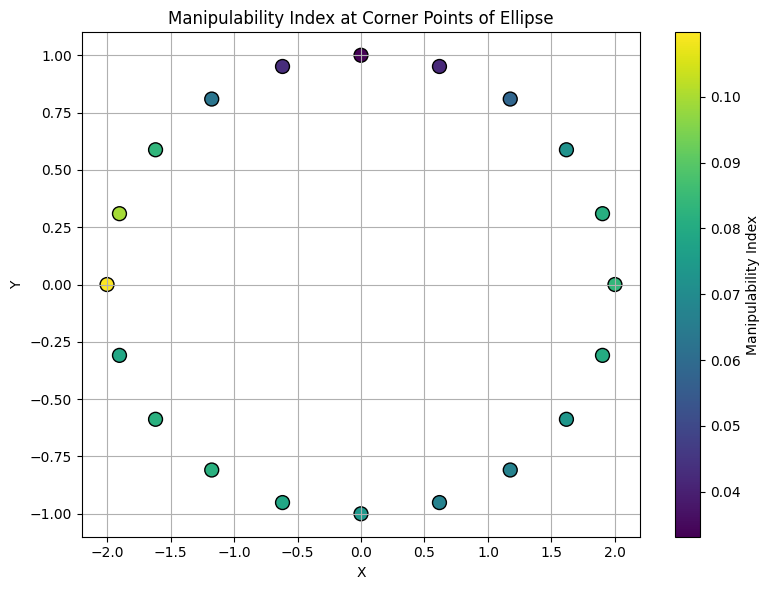

In [49]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=manipulability_indices, cmap='viridis', s=100, edgecolors='black')
plt.colorbar(label='Manipulability Index')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manipulability Index at Corner Points of Ellipse')
plt.grid(True)
plt.tight_layout()
plt.show()